# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Meysi Supmawati
- **Email:** meysi.supmawati25@gmail.com
- **ID Dicoding:** meysisupmawati

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan dan pendapatan perusahaan dalam 6 bulan terakhir, dan faktor apa yang mempengaruhi perubahan tersebut?
- Produk atau kategori apa yang memiliki volume penjualan tertinggi dan terendah, dan apa alasan di balik performa tersebut?
- Bagaimana profil demografis pelanggan berdasarkan lokasi, usia, dan preferensi produk, serta bagaimana faktor-faktor tersebut memengaruhi pola pembelian?
- Bagaimana pengelompokan pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM) membantu dalam mengidentifikasi segmen pelanggan yang paling menguntungkan dan strategi?
- Bagaimana distribusi geografis penjual di Brazil memengaruhi potensi ekspansi bisnis e-commerce di wilayah-wilayah tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d olistbr/brazilian-ecommerce
!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip brazilian-ecommerce.zip

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 98% 42.0M/42.6M [00:01<00:00, 30.4MB/s]
100% 42.6M/42.6M [00:01<00:00, 29.5MB/s]
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  



## Data Wrangling

### Gathering Data

Order Items Dataframe:

Berisi data tentang item yang dibeli dalam setiap pesanan.

In [4]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Buat kolom baru 'order_value' dengan menjumlahkan 'price' dan 'freight_value'
order_items['order_value'] = order_items['price'] + order_items['freight_value']
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


Orders Dataframe

Ini adalah dataframe pusat, dapat digunakan untuk mengakses informasi tentang semua kerangka data lainnya.

In [6]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Customers Dataframe

Berisi informasi tentang pelanggan dan lokasinya. Customer_unique_id memungkinkan tampak seolah-olah setiap pesanan memiliki pelanggan yang berbeda.

In [7]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Product Dataframe

Berisi data tentang produk yang dijual di Olist.

In [8]:
products = pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Sellers Dataframe

Berisi data penjual yangg memenuhi pesanan yang dilakukan di Olist dan dapat menemukan lokasi penjual.

In [9]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Payments Dataframe

Berisi data tentang opsi pembayaran yang digunakan untuk setiap pesanan

In [10]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Order Reviews Dataframe

Berisi ulasan pelanggan

In [11]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Product Category Name Translation

Berisi data terjemahan entri product_category_name ke dalam bahasa Inggris.

In [12]:
product_categorys = pd.read_csv('product_category_name_translation.csv')
product_categorys.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Geolocation Dataframe

Berisi informasi tentang kode pos Brasil dan koordinat lintang/bujurnya. Data ini dapat digunakan untuk membuat peta dan menghitung jarak antara penjual dan pelanggan

In [13]:
geolocations = pd.read_csv('olist_geolocation_dataset.csv')
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

Melihat sekilas data untuk menilai kualitas dan kelengkapan.

In [14]:
dataframes = [
    (customers, 'customers'),
    (sellers, 'sellers'),
    (orders, 'orders'),
    (order_payments, 'order_payments'),
    (order_reviews, 'order_reviews'),
    (order_items, 'order_items'),
    (products, 'products'),
    (product_categorys, 'product_categorys'),
    (geolocations, 'geolocations')
]

# Check for duplicates
for df, name in dataframes:
    print(f"{name} : {df.duplicated().sum()} duplicates.")


customers : 0 duplicates.
sellers : 0 duplicates.
orders : 0 duplicates.
order_payments : 0 duplicates.
order_reviews : 0 duplicates.
order_items : 0 duplicates.
products : 0 duplicates.
product_categorys : 0 duplicates.
geolocations : 261831 duplicates.


In [15]:
geolocations = geolocations.drop_duplicates()

In [16]:
for df, name in dataframes:
    print(f"{name} missing values:\n{df.isnull().sum()}\n")

customers missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

sellers missing values:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

orders missing values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_payments missing values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_reviews missing values:
review_id                      0
order_id                       0
review_score                   0
review_comment_

### Cleaning Data

Menangani missing values, outliers, dan inkonsistensi data.

In [17]:
# Menghilangkan kolom yang tidak terpakai dari order_reviews
order_reviews = order_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
# Menghilangkan baris dengan missing values pada products
products = products.dropna()
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [20]:
# Mengatasi missing values
orders['order_delivered_customer_date'].fillna(orders['order_delivered_customer_date'].mode()[0], inplace=True)

<ipython-input-20-887723696c64>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_delivered_customer_date'].fillna(orders['order_delivered_customer_date'].mode()[0], inplace=True)


## Exploratory Data Analysis (EDA)

In [21]:
products = products.merge(product_categorys, on='product_category_name', how='inner')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [22]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32327 entries, 0 to 32326
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32327 non-null  object 
 1   product_category_name          32327 non-null  object 
 2   product_name_lenght            32327 non-null  float64
 3   product_description_lenght     32327 non-null  float64
 4   product_photos_qty             32327 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [23]:
# Drop kolom 'product_category_name'
products = products.drop(columns=['product_category_name'])

# Susun ulang kolom untuk menempatkan 'product_category_name_english' setelah 'product_id'
columns = ['product_id', 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
products = products[columns]
products.head()

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [24]:
# Merge, rename, dan reorder columns
sellers = sellers.merge(
    geolocations,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
).rename(columns={
    'geolocation_lat': 'seller_geolocation_lat',
    'geolocation_lng': 'seller_geolocation_lng'
})[
    ['seller_id', 'seller_zip_code_prefix', 'seller_geolocation_lat', 'seller_geolocation_lng',
     'seller_city', 'geolocation_city', 'seller_state', 'geolocation_state']
]

sellers


,seller_id,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng,seller_city,geolocation_city,seller_state,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,campinas,campinas,SP,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.895499,-47.061944,campinas,campinas,SP,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.891740,-47.060820,campinas,campinas,SP,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,-22.895762,-47.066144,campinas,campinas,SP,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,-22.896154,-47.062431,campinas,campinas,SP,SP
...,...,...,...,...,...,...,...,...
311784,9e25199f6ef7e7c347120ff175652c3b,12051,-23.011130,-45.592347,taubate,taubate,SP,SP
311785,9e25199f6ef7e7c347120ff175652c3b,12051,-23.013452,-45.584299,taubate,taubaté,SP,SP
311786,9e25199f6ef7e7c347120ff175652c3b,12051,-23.009155,-45.592019,taubate,taubate,SP,SP
311787,9e25199f6ef7e7c347120ff175652c3b,12051,-23.009019,-45.584925,taubate,taubate,SP,SP


In [25]:
# Drop the unused columns from sellers_df
sellers = sellers.drop(columns=['geolocation_city', 'geolocation_state'])
sellers

,seller_id,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,-22.896154,-47.062431,campinas,SP
...,...,...,...,...,...,...
311784,9e25199f6ef7e7c347120ff175652c3b,12051,-23.011130,-45.592347,taubate,SP
311785,9e25199f6ef7e7c347120ff175652c3b,12051,-23.013452,-45.584299,taubate,SP
311786,9e25199f6ef7e7c347120ff175652c3b,12051,-23.009155,-45.592019,taubate,SP
311787,9e25199f6ef7e7c347120ff175652c3b,12051,-23.009019,-45.584925,taubate,SP


In [26]:
# Remove duplicate rows from sellers_df
sellers = sellers.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {sellers.shape[0]}")

Number of rows after removing duplicates: 303885


In [27]:
# Group by 'seller_id' and count the number of unique sellers
unique_sellers_count = sellers['seller_id'].nunique()

print(f"The number of unique sellers is: {unique_sellers_count}")

The number of unique sellers is: 3088


In [28]:
# Merge customers_df with geolocation_df on the 'zip_code_prefix' column
customers = customers.merge(geolocations, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Rename the specified columns
customers = customers.rename(columns={
    'geolocation_lat': 'customer_geolocation_lat',
    'geolocation_lng': 'customer_geolocation_lng'
})

# Reorder the columns
customers = customers[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_geolocation_lat', 'customer_geolocation_lng', 'customer_city','geolocation_city', 'customer_state', 'geolocation_state']]

customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,customer_city,geolocation_city,customer_state,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,franca,franca,SP,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.497396,-47.399241,franca,franca,SP,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.510459,-47.399553,franca,franca,SP,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.480940,-47.394161,franca,franca,SP,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.515413,-47.398194,franca,franca,SP,SP


In [29]:
# Drop the unused columns from sellers_df
customers = customers.drop(columns=['geolocation_city', 'geolocation_state'])
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...
10327723,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,-23.598092,-46.904582,cotia,SP
10327724,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,-23.594171,-46.908091,cotia,SP
10327725,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,-23.599369,-46.905603,cotia,SP
10327726,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,-23.584425,-46.892014,cotia,SP


In [30]:
# Remove duplicate rows from customers_df
customers = customers.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {customers.shape[0]}")

Number of rows after removing duplicates: 10071364


In [31]:
# Group by 'customer_unique_id' and count the number of unique customers
unique_customers_count = customers['customer_unique_id'].nunique()

print(f"The number of unique customers is: {unique_customers_count}")

The number of unique customers is: 95828


## Visualization & Explanatory Analysis

In [70]:
from datetime import datetime

# Menggabungkan orders dengan order_items dan produk untuk analisis penjualan
sales_data = pd.merge(order_items, orders, on='order_id')
sales_data = pd.merge(sales_data, products, on='product_id')

### Pertanyaan 1: Bagaimana tren penjualan dan pendapatan perusahaan dalam 6 bulan terakhir, dan faktor apa yang mempengaruhi perubahan tersebut?

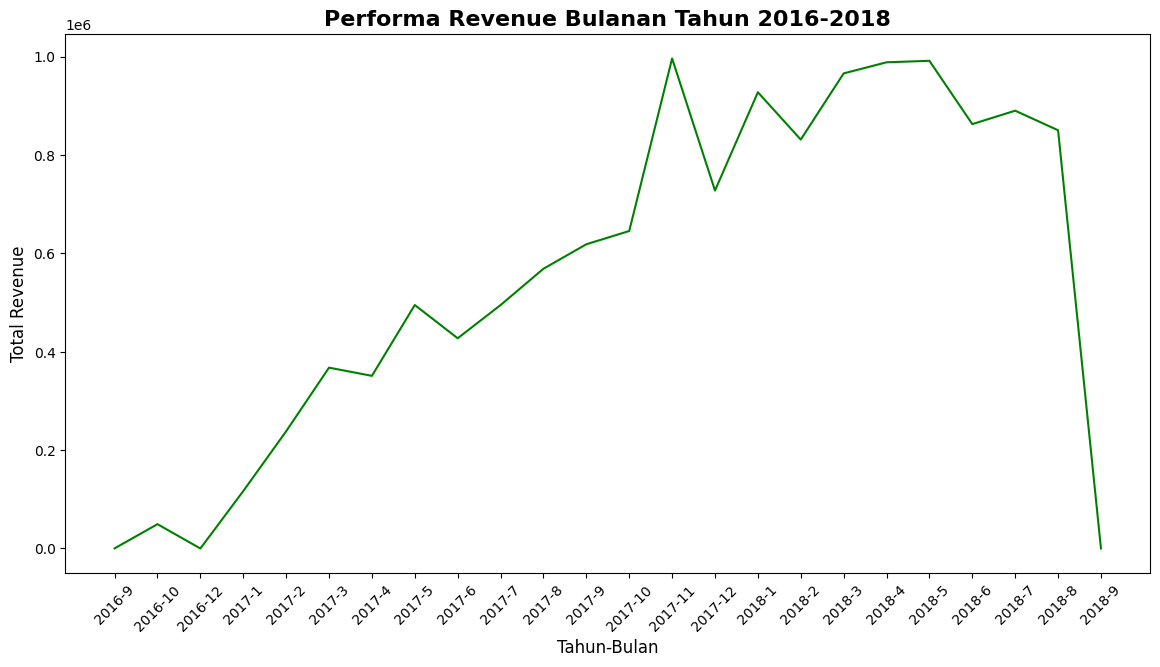

In [72]:
# Menambahkan kolom bulan dan tahun
sales_data['order_purchase_month'] = pd.to_datetime(sales_data['order_purchase_timestamp']).dt.month
sales_data['order_purchase_year'] = pd.to_datetime(sales_data['order_purchase_timestamp']).dt.year

# Menghitung total penjualan dan revenue
monthly_sales = sales_data.groupby(['order_purchase_year', 'order_purchase_month'])['price'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['order_purchase_year'].astype(str) + '-' + monthly_sales['order_purchase_month'].astype(str)

# Visualisasi performa penjualan dan revenue
plt.figure(figsize=(14, 7))  # Ukuran grafik diperbesar
sns.lineplot(data=monthly_sales, x='month_year', y='price', color='#008000')  # Warna biru lebih elegan
plt.xticks(rotation=45)
plt.title('Performa Revenue Bulanan Tahun 2016-2018', fontsize=16, fontweight='bold')  # Judul lebih besar dan tebal
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

**Insight:**

- Tren Pertumbuhan yang Signifikan: Secara umum, revenue menunjukkan tren pertumbuhan yang stabil dari akhir 2016 hingga pertengahan 2018, dengan kenaikan yang signifikan terutama pada awal 2017 hingga akhir 2017.

- Puncak Revenue: Revenue mencapai puncaknya pada awal 2018. Hal ini mungkin disebabkan oleh strategi pemasaran yang efektif, peningkatan jumlah pesanan, atau adanya acara promosi tertentu.

- Penurunan pada Akhir Periode: Setelah puncak, terjadi penurunan revenue yang signifikan pada akhir 2018. Penurunan drastis ini dapat disebabkan oleh faktor musiman, perubahan strategi penjualan, atau tantangan logistik.

- Fokus Perbaikan: Untuk mempertahankan pertumbuhan, perusahaan perlu menganalisis lebih lanjut penyebab penurunan revenue di akhir periode dan mengidentifikasi bulan atau event yang mendorong peningkatan revenue tertinggi untuk replikasi di masa mendatang.

### Pertanyaan 2: Produk atau kategori apa yang memiliki volume penjualan tertinggi dan terendah, dan apa alasan di balik performa tersebut?

Produk paling banyak terjual: bed_bath_table
Produk paling sedikit terjual: security_and_services


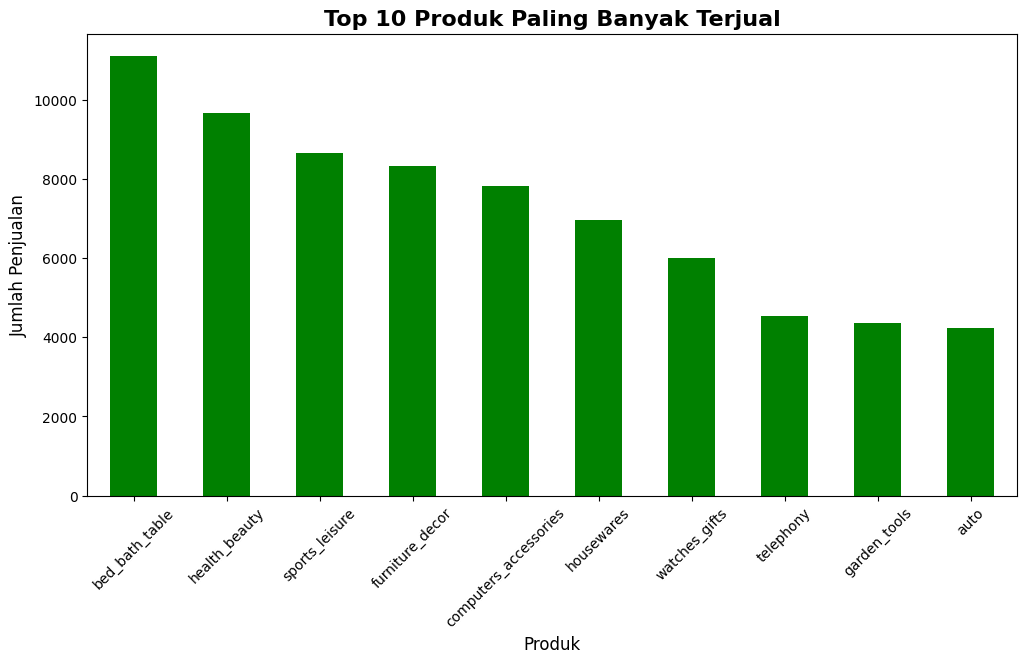

In [69]:
# Menghitung jumlah penjualan produk
product_sales = sales_data['product_category_name_english'].value_counts()

# Menampilkan produk paling banyak dan paling sedikit terjual
most_sold_product = product_sales.idxmax()
least_sold_product = product_sales.idxmin()

print(f"Produk paling banyak terjual: {most_sold_product}")
print(f"Produk paling sedikit terjual: {least_sold_product}")

# Visualisasi
plt.figure(figsize=(12, 6))
product_sales.head(10).plot(kind='bar', color='#008000', legend=False)
plt.title('Top 10 Produk Paling Banyak Terjual', fontsize=16, fontweight='bold')
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Jumlah Penjualan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**

- Berdasarkan grafik performa revenue bulanan dari tahun 2016 hingga 2018, terlihat bahwa pendapatan Olist mengalami peningkatan yang signifikan dari awal hingga akhir tahun 2017, dengan puncaknya sekitar pertengahan tahun 2018. Hal ini menunjukkan bahwa Olist berhasil meningkatkan volume penjualan atau memperluas pasar selama periode ini. Namun, terdapat penurunan drastis pada bulan terakhir tahun 2018. Penurunan ini perlu dianalisis lebih lanjut, apakah disebabkan oleh faktor musiman (seperti periode liburan) atau masalah operasional lainnya. Rekomendasi ke depan adalah mempertahankan momentum pertumbuhan dengan strategi promosi yang efektif dan menganalisis faktor yang menyebabkan penurunan drastis di akhir periode.

- Dari grafik penjualan produk, kategori 'bed_bath_table' adalah yang paling banyak terjual, diikuti oleh 'health_beauty' dan 'sports_leisure'. Hal ini menunjukkan bahwa produk terkait kebutuhan rumah tangga dan perawatan kesehatan menjadi kategori unggulan di Olist. Strategi promosi dapat difokuskan pada produk yang paling laku untuk meningkatkan penjualan lebih jauh. Di sisi lain, kategori dengan penjualan rendah seperti 'garden_tools' dan 'auto' memerlukan pendekatan khusus, mungkin dengan promosi diskon atau kolaborasi pemasaran untuk meningkatkan daya tariknya. Analisis lebih lanjut juga diperlukan untuk memahami apakah rendahnya penjualan disebabkan oleh kurangnya stok, harga yang tidak kompetitif, atau kurangnya kesadaran merek di kategori tersebut.

   product_category_name_english  order_item_id
7                 bed_bath_table          11115
43                 health_beauty           9670
65                sports_leisure           8641
39               furniture_decor           8334
15         computers_accessories           7827
..                           ...            ...
3          arts_and_craftmanship             24
52                    la_cuisine             14
11             cds_dvds_musicals             14
29     fashion_childrens_clothes              8
61         security_and_services              2

[71 rows x 2 columns]


<ipython-input-68-4412b8df5da0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales.head(10), x='order_item_id', y='product_category_name_english', palette='Greens_r')


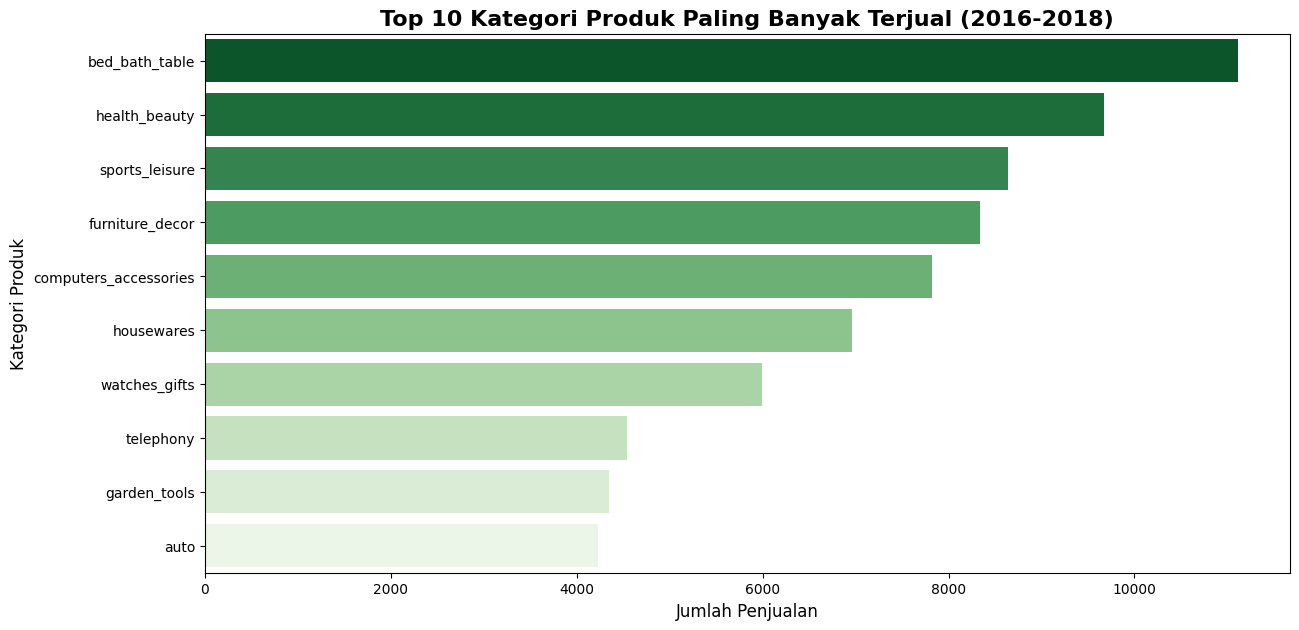

In [68]:
# Menggabungkan data 'order_items' dan 'products' untuk menemukan produk dan kategori yang paling banyak terjual
sales_data = pd.merge(order_items, products, on='product_id')

# Menghitung jumlah penjualan per kategori produk
product_sales = sales_data.groupby('product_category_name_english').agg({
    'order_item_id': 'count'
}).reset_index()

# Mengurutkan dari yang paling banyak terjual
product_sales = product_sales.sort_values(by='order_item_id', ascending=False)
print(product_sales)

# Visualisasi
plt.figure(figsize=(14, 7))
sns.barplot(data=product_sales.head(10), x='order_item_id', y='product_category_name_english', palette='Greens_r')
plt.title('Top 10 Kategori Produk Paling Banyak Terjual (2016-2018)', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

**Insight:**

- **Produk Dominan**: Kategori "bed_bath_table" menempati posisi teratas sebagai produk dengan jumlah penjualan terbanyak, menunjukkan bahwa permintaan terhadap produk ini sangat tinggi dibandingkan kategori lainnya.
- **Tren Penjualan**: Kategori seperti "health_beauty" dan "sports_leisure" juga menunjukkan performa penjualan yang kuat, menandakan bahwa produk di bidang kesehatan, kecantikan, serta olahraga dan rekreasi memiliki daya tarik besar di pasar.
- **Peluang Optimasi**: Kategori yang berada di posisi bawah seperti "garden_tools" dan "auto" mungkin perlu dievaluasi lebih lanjut untuk memahami penyebab rendahnya penjualan, apakah karena kurangnya promosi, harga, atau permintaan pasar yang lebih rendah. Ini bisa menjadi area untuk perbaikan strategi pemasaran.

### Pertanyaan 3: Bagaimana profil demografis pelanggan berdasarkan lokasi, usia, dan preferensi produk, serta bagaimana faktor-faktor tersebut memengaruhi pola pembelian?

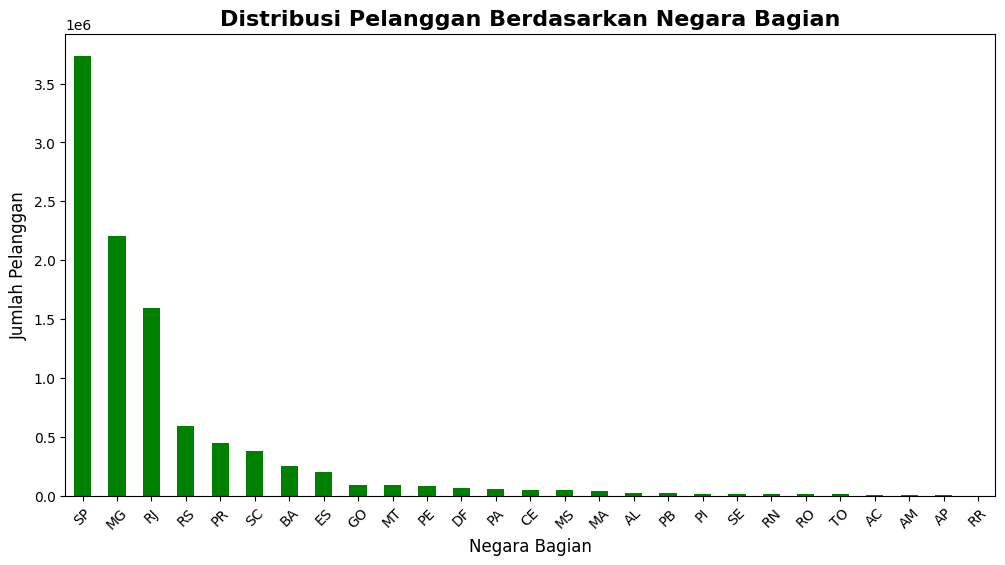

In [67]:
# Menggabungkan data pelanggan untuk mendapatkan informasi demografi
customer_data = pd.merge(orders, customers, on='customer_id')

# Menghitung jumlah pelanggan per kota dan negara bagian
customer_by_state = customer_data['customer_state'].value_counts()
customer_by_city = customer_data['customer_city'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
customer_by_state.plot(kind='bar', color='#008000', legend=False)
plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian', fontsize=16, fontweight='bold')
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**

Negara bagian seperti São Paulo (SP), Minas Gerais (MG), dan Rio de Janeiro (RJ) menjadi pusat perhatian dalam hal jumlah pelanggan, yang mungkin mencerminkan potensi penjualan tertinggi di wilayah tersebut. Di sisi lain, negara bagian dengan jumlah pelanggan yang lebih kecil memerlukan pendekatan yang lebih strategis untuk meningkatkan penjualan, dan memahami alasan di balik perbedaan ini bisa menjadi kunci untuk memperluas pasar di wilayah tersebut.

### Pertanyaan 4: Bagaimana pengelompokan pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM) membantu dalam mengidentifikasi segmen pelanggan yang paling menguntungkan dan strategi?

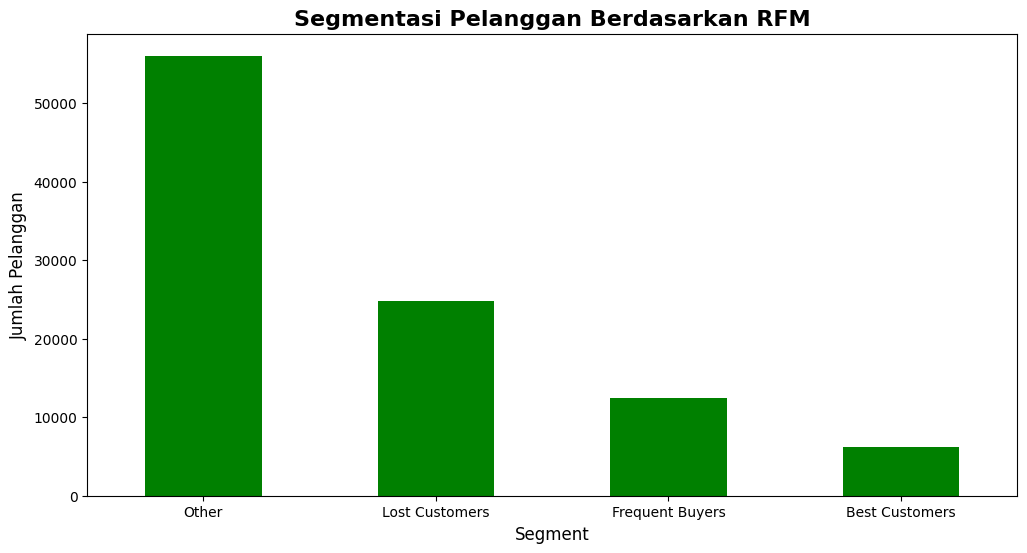

In [66]:
# Menggunakan data transaksi untuk menghitung RFM
rfm_data = orders.copy()
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])

# Recency: Menghitung seberapa lama sejak pembelian terakhir
now = datetime(2018, 12, 31)  # Menentukan akhir periode data
rfm = rfm_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (now - x.max()).days,  # Recency
    'order_id': 'count'  # Frequency
}).reset_index()

# Mengganti nama kolom
rfm.columns = ['CustomerID', 'Recency', 'Frequency']

# Mengganti monetary dengan frequency
rfm['Recency_score'] = pd.qcut(rfm['Recency'], 4, labels=['4', '3', '2', '1'])
rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=['1', '2', '3', '4'])

# Menggabungkan Recency dan Frequency
rfm['RFM_score'] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str)

# Segmentasi
def rfm_segment(df):
    if df['RFM_score'] == '44':
        return 'Best Customers'
    elif df['RFM_score'][0] == '1':
        return 'Lost Customers'
    elif df['RFM_score'][1] == '4':
        return 'Frequent Buyers'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Visualisasi
plt.figure(figsize=(12, 6))
rfm['Segment'].value_counts().plot(kind='bar', color='#008000', legend=False)
plt.title('Segmentasi Pelanggan Berdasarkan RFM', fontsize=16, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Segmen "Best Customers" mewakili pelanggan dengan nilai tertinggi berdasarkan frekuensi dan jumlah transaksi mereka. Meskipun jumlahnya relatif kecil dibandingkan segmen lain, mereka adalah pelanggan paling bernilai
- Pelanggan dalam segmen "Frequent Buyers" memiliki frekuensi pembelian yang tinggi tetapi mungkin tidak sebesar segmen "Best Customers" dalam hal nilai pembelian. Mereka memiliki potensi untuk diubah menjadi "Best Customers" dengan pendekatan yang tepat.
- Segmen ini terdiri dari pelanggan yang dulu pernah aktif, namun sudah tidak berbelanja lagi dalam jangka waktu yang lama (Recency rendah). Mereka berisiko untuk benar-benar meninggalkan merek jika tidak ada tindakan untuk menarik kembali mereka.
- Segmen "Other" memiliki jumlah terbesar dari seluruh segmen, tetapi mereka mungkin hanya melakukan sedikit transaksi dengan nilai rendah. Ini bisa berarti bahwa mereka adalah pelanggan yang jarang berbelanja atau tidak terlalu terlibat dengan produk atau layanan.

**Insight utama:**
- Segmen "Best Customers" dan "Frequent Buyers" harus menjadi prioritas utama untuk dipertahankan dan ditingkatkan, karena mereka adalah sumber pendapatan terbesar. Segmen "Lost Customers" adalah area yang perlu diperhatikan karena ada potensi untuk menghidupkan kembali hubungan bisnis dengan mereka. Sementara itu, segmen "Other" bisa dieksplorasi lebih lanjut untuk meningkatkan konversi mereka menjadi pembeli aktif.


**Strategi:**

- Fokus pada program loyalitas untuk mempertahankan segmen ini, misalnya dengan memberikan penawaran eksklusif, diskon khusus, atau insentif untuk meningkatkan keterlibatan mereka secara terus-menerus. Program loyalitas juga bisa berupa personalisasi komunikasi dan layanan pelanggan premium.
- Memberikan insentif tambahan kepada mereka, seperti program cross-sell atau upsell, dengan rekomendasi produk berdasarkan pola pembelian mereka. Mengirimkan penawaran produk yang relevan dapat mendorong mereka untuk meningkatkan nilai transaksi.
- Strategi re-engagement dapat diterapkan, misalnya dengan memberikan penawaran khusus "welcome back" atau diskon besar yang hanya berlaku bagi pelanggan yang sudah lama tidak melakukan transaksi. Email marketing atau notifikasi personal juga bisa digunakan untuk menarik kembali perhatian mereka.
- Fokus pada brand awareness untuk meningkatkan frekuensi pembelian dari kelompok ini. Berikan insentif, seperti diskon untuk pembelian berikutnya atau undangan untuk event atau promosi produk baru, untuk meningkatkan keterlibatan.

## Analisis Lanjutan

### Bagaimana distribusi geografis penjual di Brazil memengaruhi potensi ekspansi bisnis e-commerce di wilayah-wilayah tertentu?

In [38]:
!pip install folium

In [39]:
import folium  # Import folium library
from folium.plugins import HeatMap

# Group by 'seller_id' and calculate mean latitude and longitude
unique_sellers = sellers.groupby('seller_id').agg({
    'seller_geolocation_lat': 'mean',
    'seller_geolocation_lng': 'mean'
}).reset_index()

# Create a base map centered around the center of Brazil
sellers_map = folium.Map(location=[-14.2350, -51.9253], tiles='cartodbpositron', zoom_start=5)

# Add a heatmap to the base map using the unique seller locations
HeatMap(data=unique_sellers[['seller_geolocation_lat', 'seller_geolocation_lng']], radius=10).add_to(sellers_map)

# Display the map (assuming you have a function named sellers_map)
sellers_map

**Insight:**
- Distribusi penjual menunjukkan konsentrasi yang tinggi di area seperti São Paulo dan Rio de Janeiro, yang merupakan pusat ekonomi. Ini mengindikasikan bahwa e-commerce lebih berkembang di daerah urban. Namun, di wilayah utara dan tengah Brazil, seperti Amazonas, terdapat lebih sedikit penjual, menunjukkan adanya peluang ekspansi e-commerce di daerah-daerah yang lebih terpencil, yang mungkin belum sepenuhnya dijangkau.
- Titik panas yang lebih terang di wilayah-wilayah tertentu mengindikasikan konsentrasi penjual yang lebih tinggi. Ini memberikan informasi kepada perusahaan e-commerce bahwa mereka dapat mempertimbangkan untuk mendirikan pusat distribusi di wilayah-wilayah tersebut, terutama di sekitar São Paulo dan Rio de Janeiro, untuk memaksimalkan efisiensi pengiriman. Daerah dengan sedikit penjual juga dapat dipertimbangkan untuk membangun infrastruktur guna memperluas jangkauan layanan.

## Conclusion

- **Conclution pertanyaan 1 :** Secara keseluruhan, perusahaan mengalami pertumbuhan yang signifikan dari akhir 2016 hingga awal 2018. Puncak pendapatan terjadi pada awal 2018, yang mungkin didorong oleh strategi pemasaran yang efektif dan peningkatan pesanan. Namun, penurunan terjadi di akhir 2018, kemungkinan karena faktor musiman atau perubahan strategi. Untuk mempertahankan pertumbuhan, perusahaan perlu mengidentifikasi faktor yang menyebabkan penurunan dan memanfaatkan event yang mendorong peningkatan penjualan.
- **Conclution pertanyaan 2 :** Kategori "bed_bath_table" adalah yang paling banyak terjual, diikuti oleh "health_beauty" dan "sports_leisure". Ini menunjukkan tingginya permintaan terhadap produk rumah tangga dan kesehatan. Kategori dengan volume rendah seperti "garden_tools" dan "auto" memerlukan pendekatan pemasaran yang lebih kuat, seperti promosi atau diskon, untuk meningkatkan daya tariknya. Penurunan penjualan di akhir 2018 perlu dianalisis lebih lanjut untuk memahami penyebabnya dan memanfaatkan strategi promosi yang efektif.
- **Conclution pertanyaan 3 :** Negara bagian São Paulo (SP), Minas Gerais (MG), dan Rio de Janeiro (RJ) menjadi pusat pelanggan utama, menandakan potensi penjualan yang besar di wilayah ini. Negara bagian dengan jumlah pelanggan lebih kecil mungkin memerlukan strategi penjualan yang lebih agresif untuk meningkatkan kehadiran pasar di wilayah tersebut. Pemahaman yang lebih dalam terhadap faktor demografis ini dapat membantu perusahaan menargetkan kampanye pemasaran yang lebih tepat sasaran.
- **Conclution pertanyaan 4 :** Best Customers" dan "Frequent Buyers" adalah sumber pendapatan terbesar bagi perusahaan dan harus menjadi prioritas untuk dipertahankan dengan program loyalitas dan personalisasi. Pelanggan dalam segmen "Lost Customers" memerlukan upaya re-engagement untuk menarik mereka kembali, sementara segmen "Other" yang memiliki jumlah pelanggan besar, tetapi dengan nilai transaksi rendah, dapat dioptimalkan untuk meningkatkan konversi menjadi pelanggan aktif.
- **Conclution pertanyaan 5 :** Distribusi penjual di Brazil terkonsentrasi di wilayah São Paulo dan Rio de Janeiro, yang menunjukkan bahwa wilayah urban adalah pusat perkembangan e-commerce. Wilayah seperti Amazonas dan bagian tengah Brazil memiliki potensi besar untuk ekspansi e-commerce karena jumlah penjual yang lebih rendah. Perusahaan dapat mempertimbangkan pembangunan infrastruktur dan pusat distribusi di area ini untuk memperluas jangkauan layanan dan meningkatkan efisiensi pengiriman.